<a href="https://colab.research.google.com/github/sravanthivalluru06/OIB-SIP/blob/main/Project_2_Proposal_Level_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import plotly.express as px

sns.set(style="whitegrid")


UPLOAD THE DATASET INTO COLAB

In [3]:
from google.colab import files
uploaded = files.upload()


Saving WineQT.csv to WineQT.csv


INITIAL EXPLORATION, DESCRIPTIVE STATISTICS, DATA CLEANING AND PREPROCESSING

In [4]:
DATA_PATH = "/content/WineQT.csv"

df = pd.read_csv(DATA_PATH)

# Basic EDA
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:\n", df.head())
print("\nData info:\n")
df.info()

print("\nSummary statistics:\n", df.describe())

print("\nMissing values:\n", df.isnull().sum())


Dataset shape: (1143, 13)

First 5 rows:
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        

VISUALIZATION

/tmp/ipython-input-4214797690.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="quality", data=df, palette="viridis")


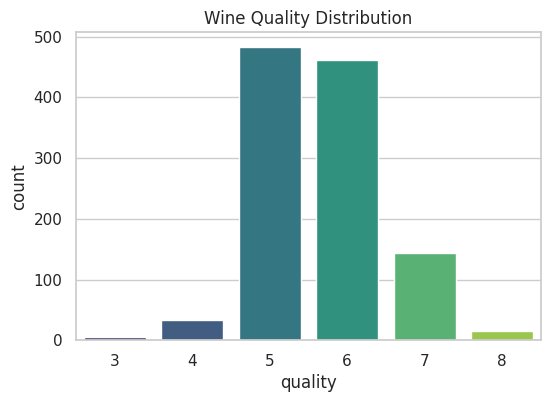

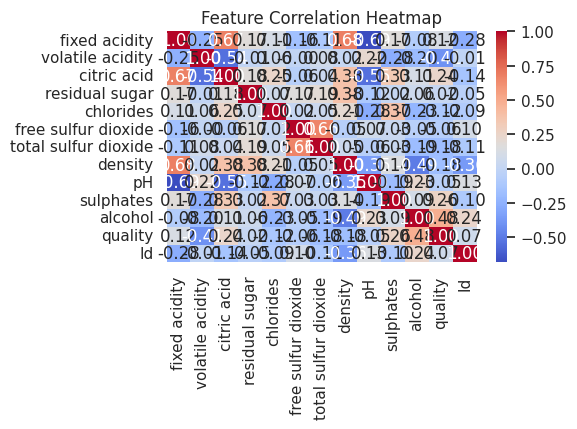

/tmp/ipython-input-4214797690.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="quality", y="density", data=df, palette="Set2")


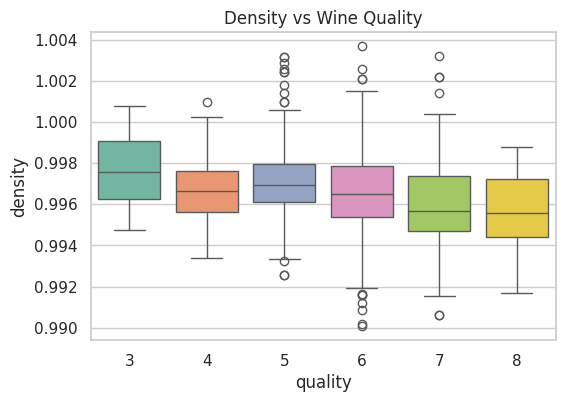

/tmp/ipython-input-4214797690.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="quality", y="volatile acidity", data=df, palette="Set1")


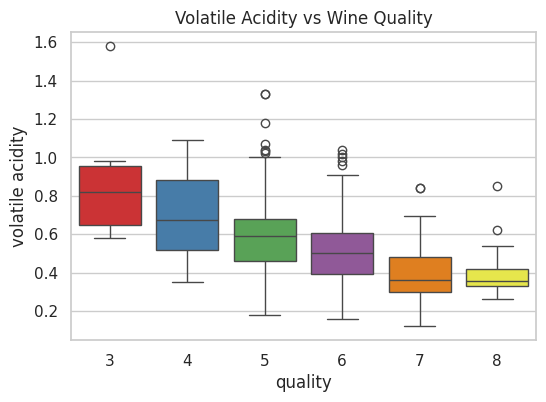

In [5]:
sns.set(style="whitegrid")

plt.figure(figsize=(6,4))
sns.countplot(x="quality", data=df, palette="viridis")
plt.title("Wine Quality Distribution")
plt.show()

plt.figure(figsize=(5,3))
corr = df.select_dtypes(include=["number"]).corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x="quality", y="density", data=df, palette="Set2")
plt.title("Density vs Wine Quality")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x="quality", y="volatile acidity", data=df, palette="Set1")
plt.title("Volatile Acidity vs Wine Quality")
plt.show()

FEATURE SELECTION AND ENGINEERING

In [ ]:
df["quality_label"] = df["quality"].apply(lambda x: 1 if x >= 7 else 0)

X = df.drop(columns=["quality", "quality_label"])
y = df["quality_label"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

MODEL TRAINING


===== Random Forest =====
Accuracy: 0.9344978165938864
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       201
           1       0.78      0.64      0.71        28

    accuracy                           0.93       229
   macro avg       0.87      0.81      0.83       229
weighted avg       0.93      0.93      0.93       229



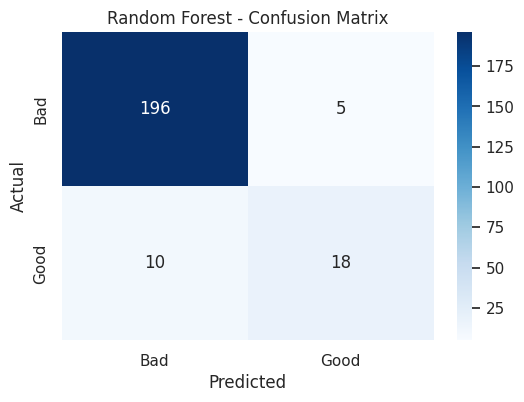


===== SGD Classifier =====
Accuracy: 0.834061135371179
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.89      0.90       201
           1       0.35      0.43      0.39        28

    accuracy                           0.83       229
   macro avg       0.64      0.66      0.65       229
weighted avg       0.85      0.83      0.84       229



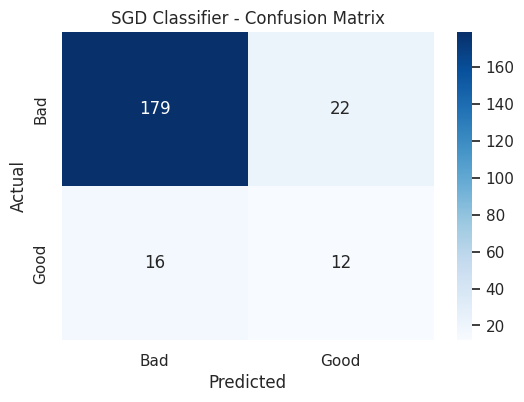


===== SVC =====
Accuracy: 0.8995633187772926
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94       201
           1       0.69      0.32      0.44        28

    accuracy                           0.90       229
   macro avg       0.80      0.65      0.69       229
weighted avg       0.89      0.90      0.88       229



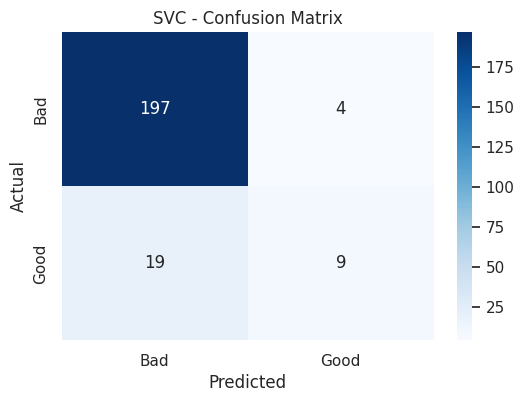

In [ ]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "SGD Classifier": SGDClassifier(random_state=42),
    "SVC": SVC(random_state=42)
}

results = {}

for name, model in models.items():
    print(f"\n===== {name} =====")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print("Accuracy:", acc)
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Bad", "Good"], yticklabels=["Bad", "Good"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

EVALUATION

In [ ]:
print("\nModel Accuracy Comparison:")
for model_name, acc in results.items():
    print(f"{model_name}: {acc:.4f}")



Model Accuracy Comparison:
Random Forest: 0.9345
SGD Classifier: 0.8341
SVC: 0.8996
